# Questions to ask
- What are some factors that are correlated with each other?
- Is heart disease more prevalent in older people? 
- Is heart disease more prevalent in males than females or vice versa?
- Are people with family history of heart disease more likely to get heart disease? 
- Compare health metrics for patients with and without heart disease.
- How does lifestyle factors such as Smoking, Alcohol Consumption affects heart disease? 
- Compare diabetic individuals with non-diabetic individuals.

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load and Inspect Data

In [2]:
heart_df = pd.read_csv("heart_disease.csv")
heart_df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
print("Dataset Information:")
print(heart_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15 

In [4]:
print("Descriptive statistics for numerical variables of dataset:")
print(heart_df.describe())

Descriptive statistics for numerical variables of dataset:
               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min   

In [5]:
print("Number of null values in dataset:")
print(heart_df.isna().sum())

Number of null values in dataset:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


# Data Cleaning and Preprocessing 
1. Replace with 0 and 1 for:
- Heart Disease Status (1 for Yes, 0 for No)

2. Handle null values 
- Replace null values for Alcohol Consumption with Unknown (since there is 2586 values that are null)
- Replace null values for Age with mean age 
- Replace null values for Gender with No Gender
- Drop duplicates if any
- Drop rows with null values

In [6]:
# Replace with 0 and 1 for Heart Disease Status
heart_df["Heart Disease Status"] = heart_df["Heart Disease Status"].map({"Yes": 1, "No": 0})

# Replace null values for Alcohol Consumption with Unknown
heart_df["Alcohol Consumption"] = heart_df["Alcohol Consumption"].fillna("Unknown")
# Replace null values for Gender with No Gender
heart_df["Gender"] = heart_df["Gender"].fillna("No Gender")
# Replace null values for Age with mean age
heart_df["Age"] = heart_df["Age"].fillna(heart_df["Age"].mean())

# Drop duplicates
heart_df = heart_df.drop_duplicates()

# Drop null values (use for certain graphs)
other_df = heart_df.dropna()
print(len(heart_df))
print(len(other_df))

10000
9580


# Data Visualisation 

### What are some factors that are correlated with each other?

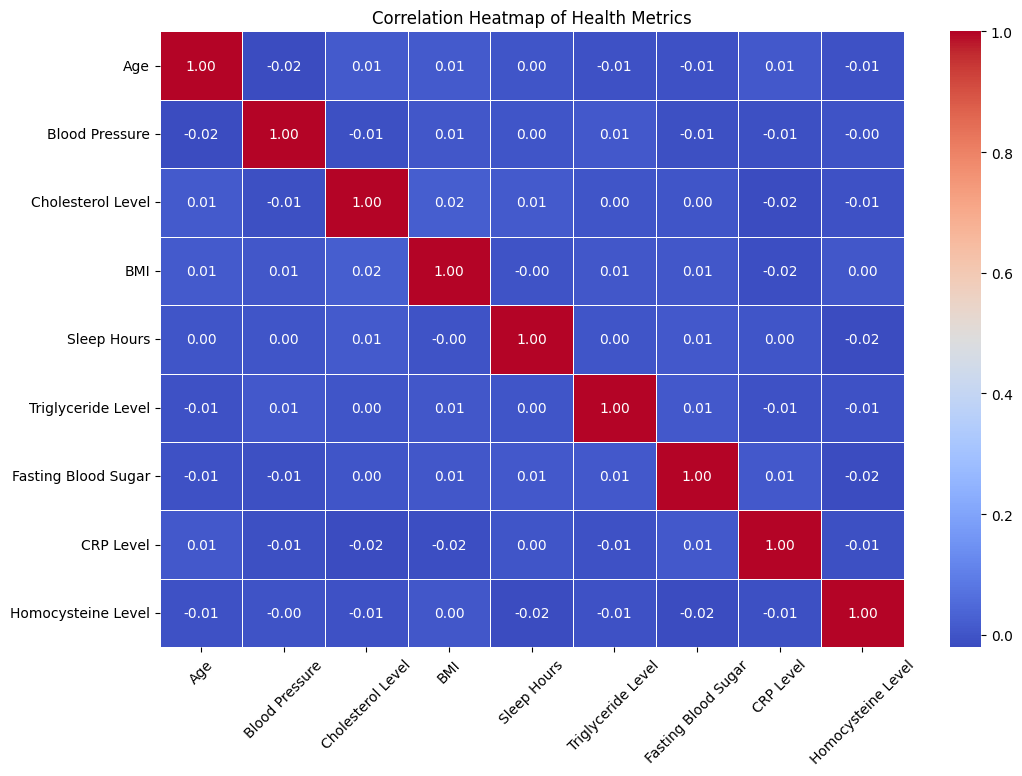

In [7]:
numeric_cols = ["Age", "Blood Pressure", "Cholesterol Level", "BMI", "Sleep Hours", 
                "Triglyceride Level", "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"]

corr_matrix = heart_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation = 45)
plt.title("Correlation Heatmap of Health Metrics")

plt.show()

From the heatmap above, the numeric health metrics are highly uncorrelated. 

### Is heart disease more prevalent in older people?

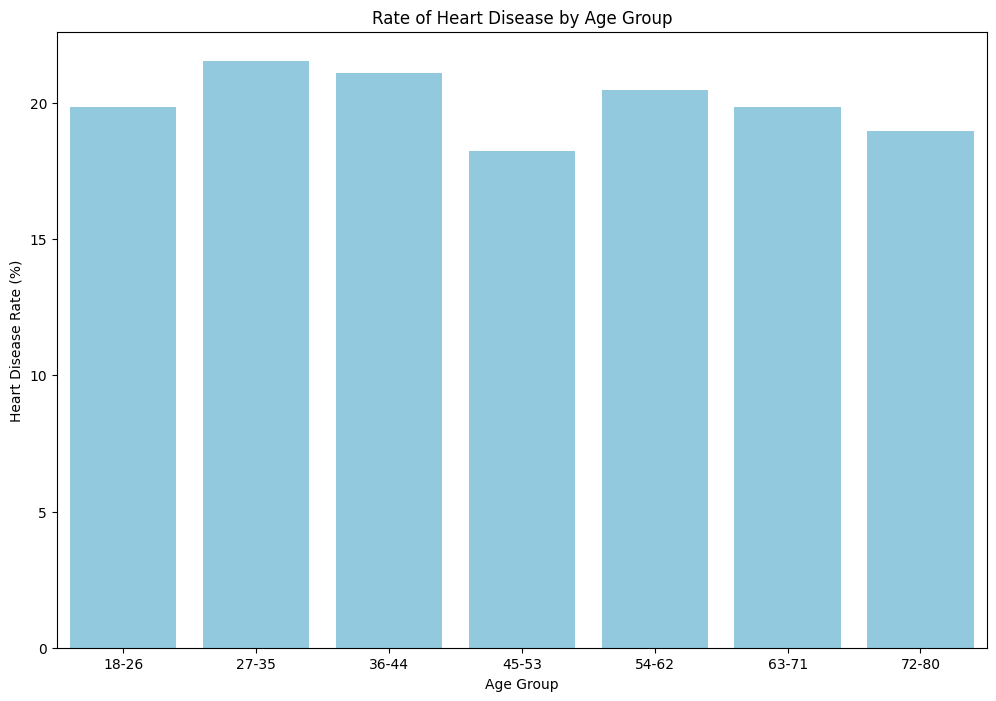

In [8]:
# Group Age into Age Groups (min: 18, max: 80)
def group_by_age(row):
    if row["Age"] >= 18 and row["Age"] < 27:
        return "18-26"
    elif row["Age"] >= 27 and row["Age"] < 36:
        return "27-35"
    elif row["Age"] >= 36 and row["Age"] < 45:
        return "36-44"
    elif row["Age"] >= 45 and row["Age"] < 54:
        return "45-53"
    elif row["Age"] >= 54 and row["Age"] < 63:
        return "54-62"
    elif row["Age"] >= 63 and row["Age"] < 72:
        return "63-71"
    else:
        return "72-80"

heart_df["Age_Category"] = heart_df.apply(group_by_age, axis=1)

# Percentage of people with heart disease by age group
heart_disease_rate = heart_df.groupby("Age_Category")['Heart Disease Status'].mean().reset_index(name='Heart Disease Rate')
heart_disease_rate['Heart Disease Rate'] = heart_disease_rate['Heart Disease Rate'] * 100

plt.figure(figsize=(12,8))
sns.barplot(data=heart_disease_rate, x='Age_Category', y='Heart Disease Rate', color="skyblue")

plt.title("Rate of Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Rate (%)")

plt.show()

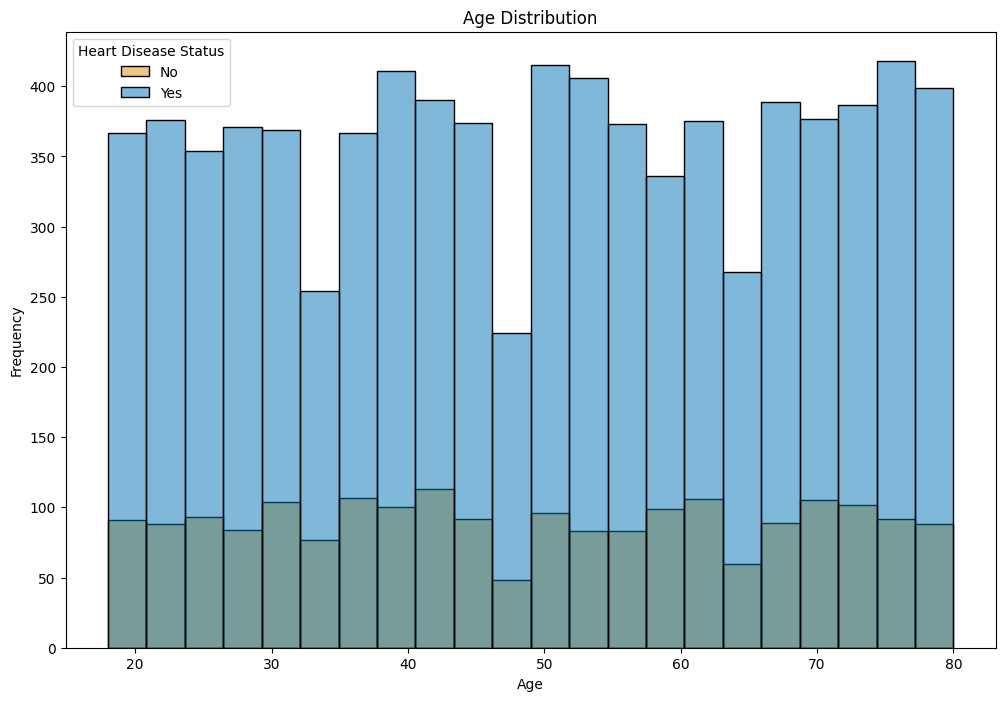

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(x=heart_df['Age'], hue=heart_df['Heart Disease Status'], palette="colorblind", legend=False)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["No", "Yes"], title="Heart Disease Status", loc="upper left")

plt.show()

### Is heart disease more prevalent in males than females or vice versa?

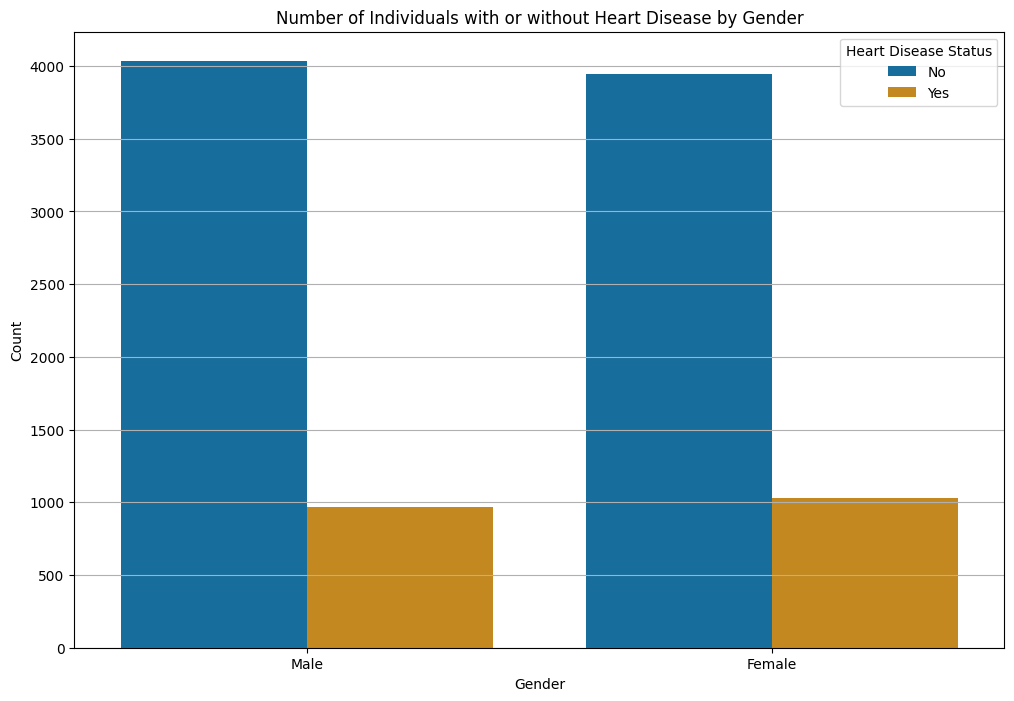

In [10]:
heart_gender = heart_df[heart_df["Gender"] != "No Gender"]
plt.figure(figsize=(12, 8))

sns.countplot(data=heart_gender, x="Gender", hue="Heart Disease Status", palette="colorblind", legend=False)
plt.title("Number of Individuals with or without Heart Disease by Gender")
plt.legend(["No", "Yes"], title="Heart Disease Status", loc="upper right")
plt.ylabel("Count")
plt.grid(axis='y')

plt.show()

More females than males have heart disease in this dataset and fewer females than males do not have heart diseases.

### Are people with family history of heart disease more likely to get heart disease?

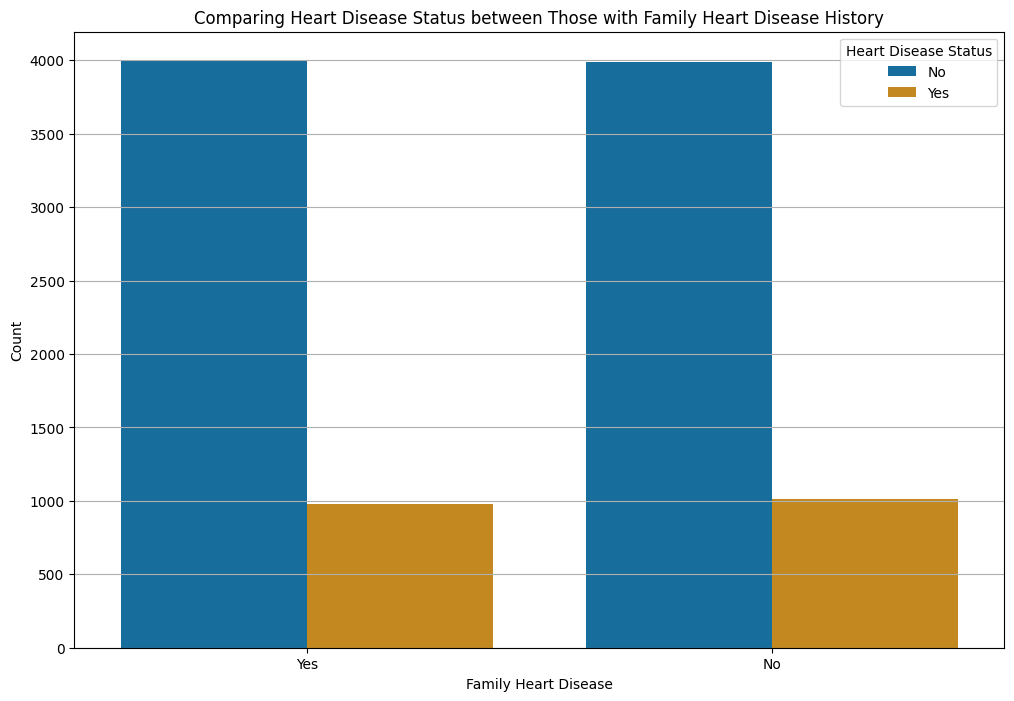

In [11]:
plt.figure(figsize=(12, 8))

sns.countplot(data=heart_df, x="Family Heart Disease", hue="Heart Disease Status", palette="colorblind", legend=False)
plt.title("Comparing Heart Disease Status between Those with Family Heart Disease History")
plt.ylabel("Count")
plt.legend(["No", "Yes"], title="Heart Disease Status", loc="upper right", )
plt.grid(axis='y')

plt.show()

As the total number of individuals with family heart disease is almost equal to the total number of individuals without family heart disease, and the number of individuals with heart disease and have family heart disease is almost equal to the number of individuals with heart disease and do not have family heart disease, it is likely that having heart disease is not genetic.

### Compare health metrics for patients with and without heart disease.

In [12]:
# Use the dataframe without null values for the numeric columns
health_metrics = other_df.copy()
health_metrics["Heart Disease Status"] = health_metrics["Heart Disease Status"].map({0: "No", 1: "Yes"})

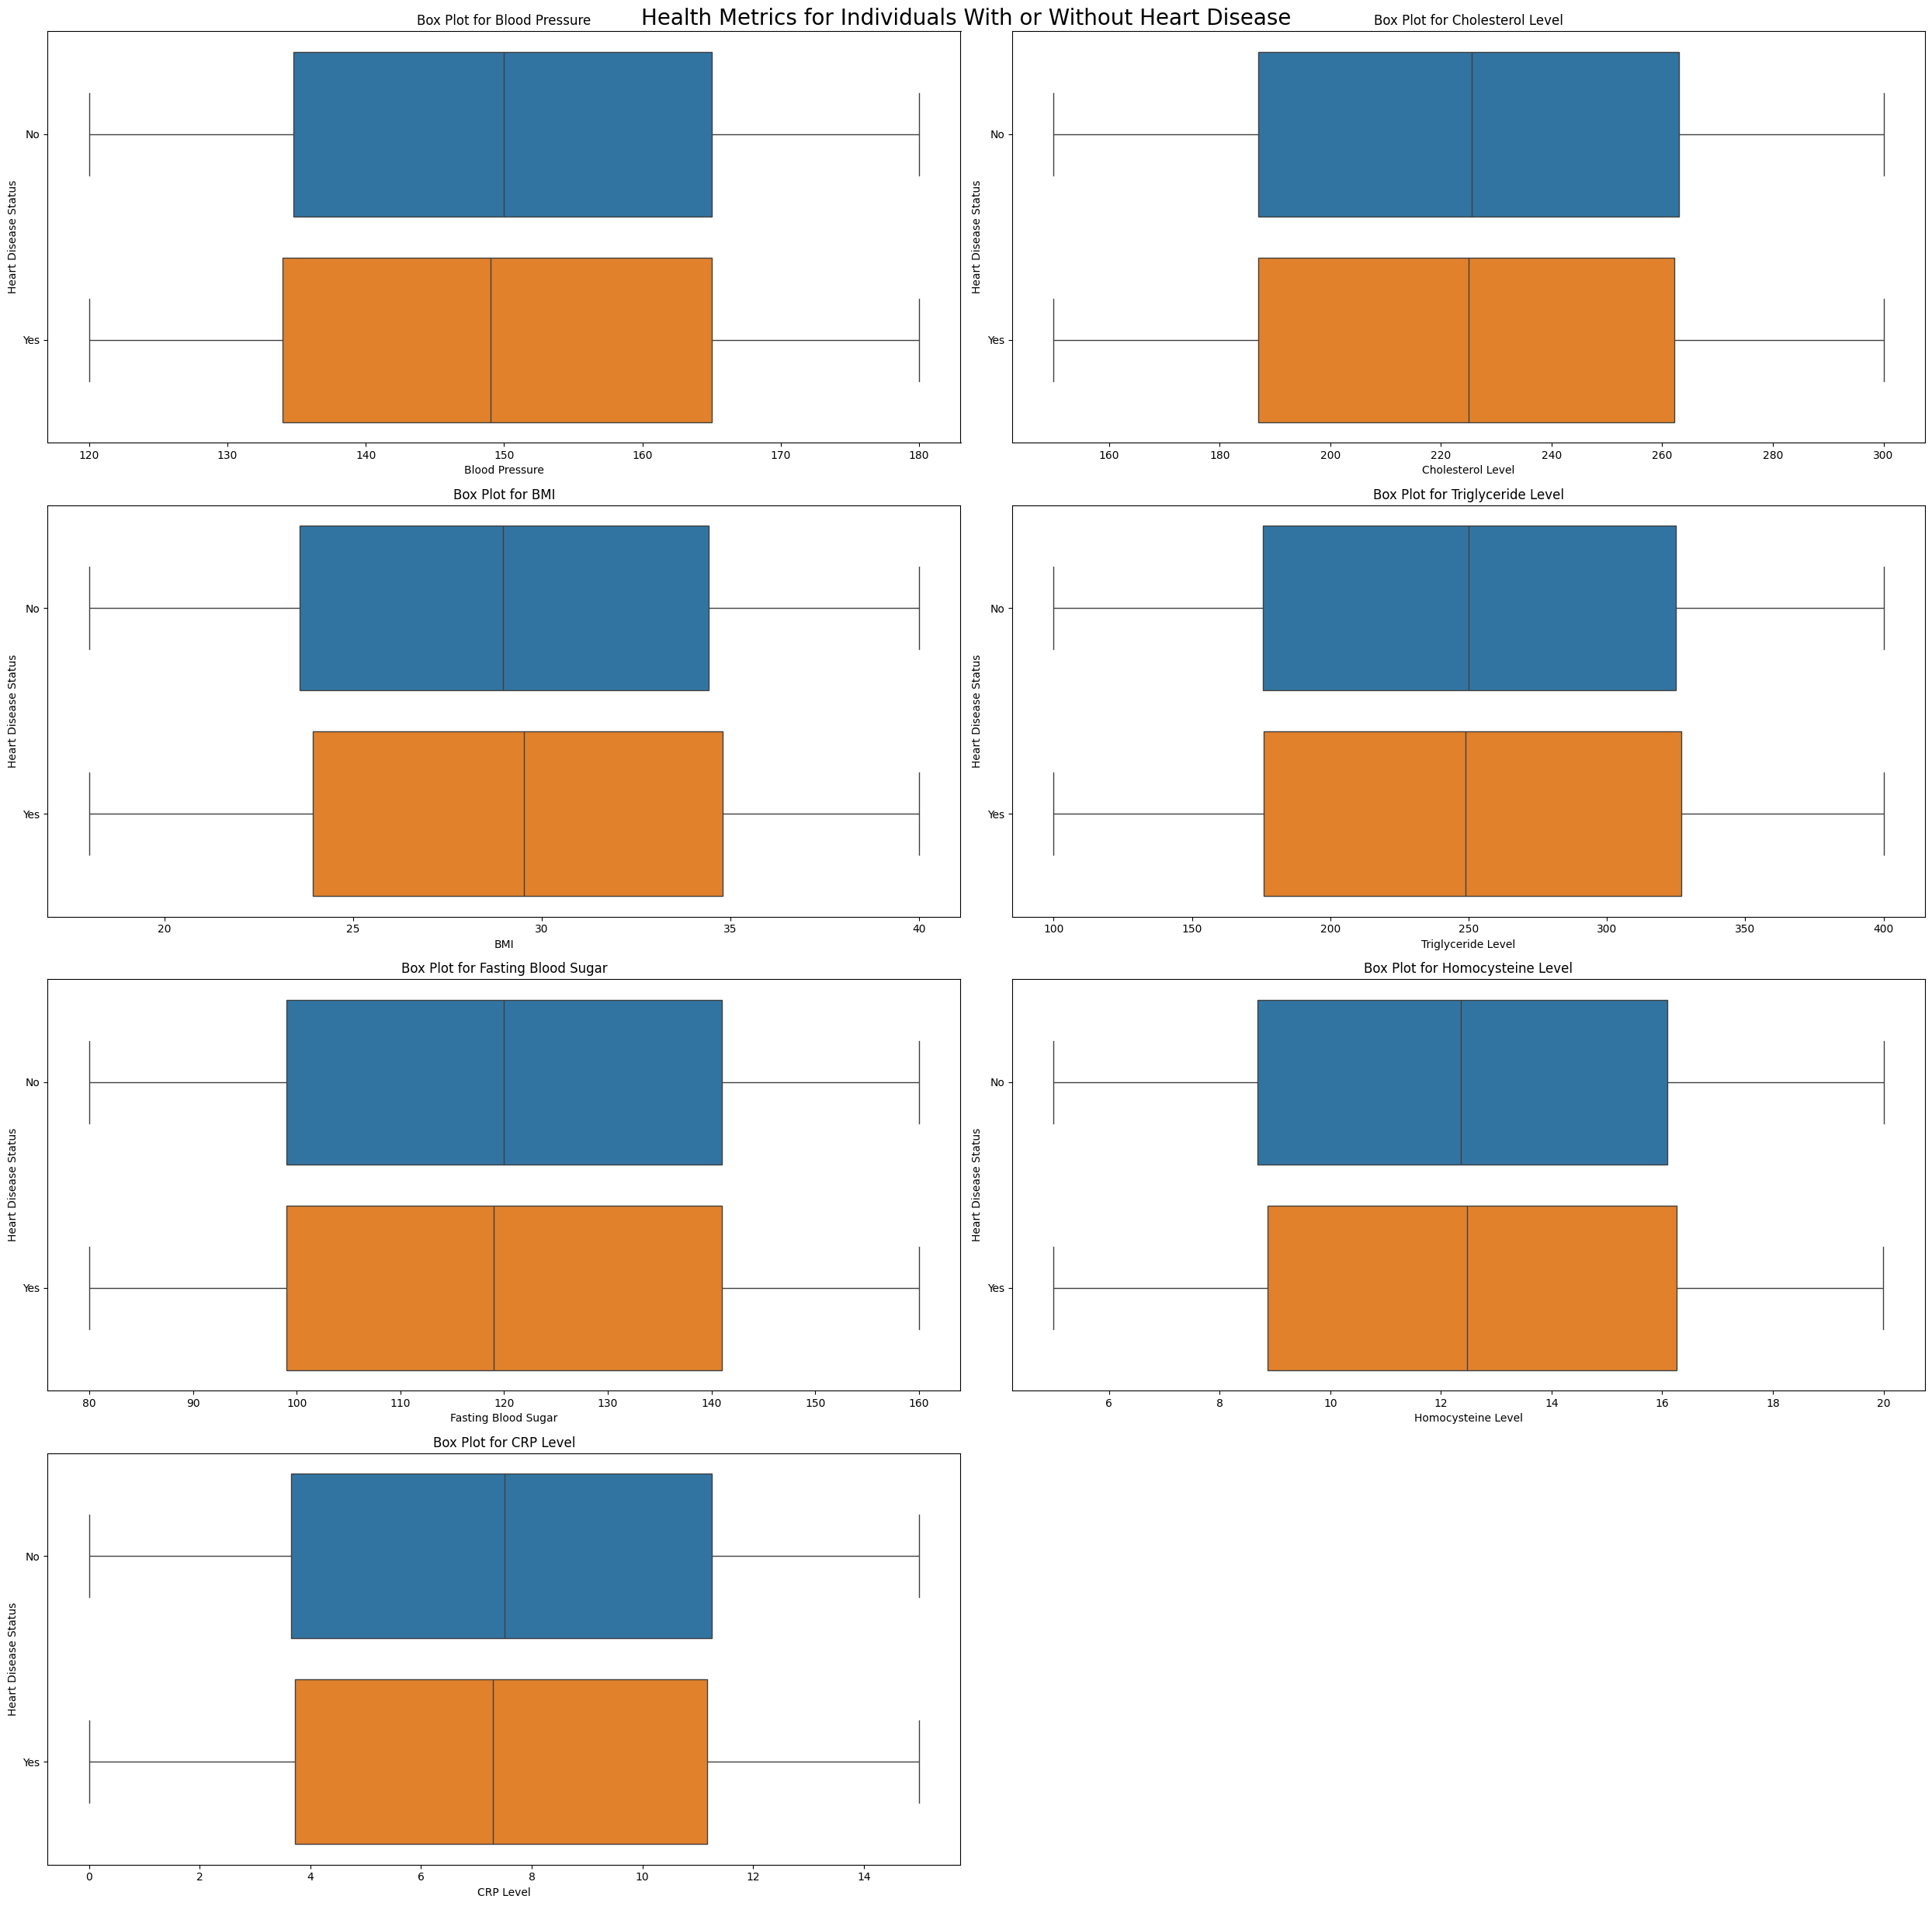

In [13]:
fig = plt.figure(figsize=(25, 25))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

# Blood Pressure, Cholesterol Level, BMI, Triglyceride Level, Fasting Blood Sugar, Homocysteine Level
fig.suptitle("Health Metrics for Individuals With or Without Heart Disease", fontsize=20)

plt.subplot(4, 2, 1)
sns.boxplot(data=health_metrics, x="Blood Pressure", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for Blood Pressure")

plt.subplot(4, 2, 2)
sns.boxplot(data=health_metrics, x="Cholesterol Level", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for Cholesterol Level")

plt.subplot(4, 2, 3)
sns.boxplot(data=health_metrics, x="BMI", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for BMI")

plt.subplot(4, 2, 4)
sns.boxplot(data=health_metrics, x="Triglyceride Level", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for Triglyceride Level")

plt.subplot(4, 2, 5)
sns.boxplot(data=health_metrics, x="Fasting Blood Sugar", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for Fasting Blood Sugar")

plt.subplot(4, 2, 6)
sns.boxplot(data=health_metrics, x="Homocysteine Level", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for Homocysteine Level")

plt.subplot(4, 2, 7)
sns.boxplot(data=health_metrics, x="CRP Level", y="Heart Disease Status", hue="Heart Disease Status")
plt.title("Box Plot for CRP Level")

fig.tight_layout()
plt.show()

### How does lifestyle factors such as Smoking, Alcohol Consumption affects heart disease?

In [14]:
# Use the dataframe without null values for lifestyle factors such as Exercise Habits, Smoking, Alcohol Consumption and Sugar Consumption
lifestyle = other_df.copy()

# Remove the rows that do not have Alcohol Consumption value
lifestyle = lifestyle[lifestyle["Alcohol Consumption"] != "Unknown"]

lifestyle["Heart Disease Status"] = lifestyle["Heart Disease Status"].map({1: "Yes", 0: "No"})

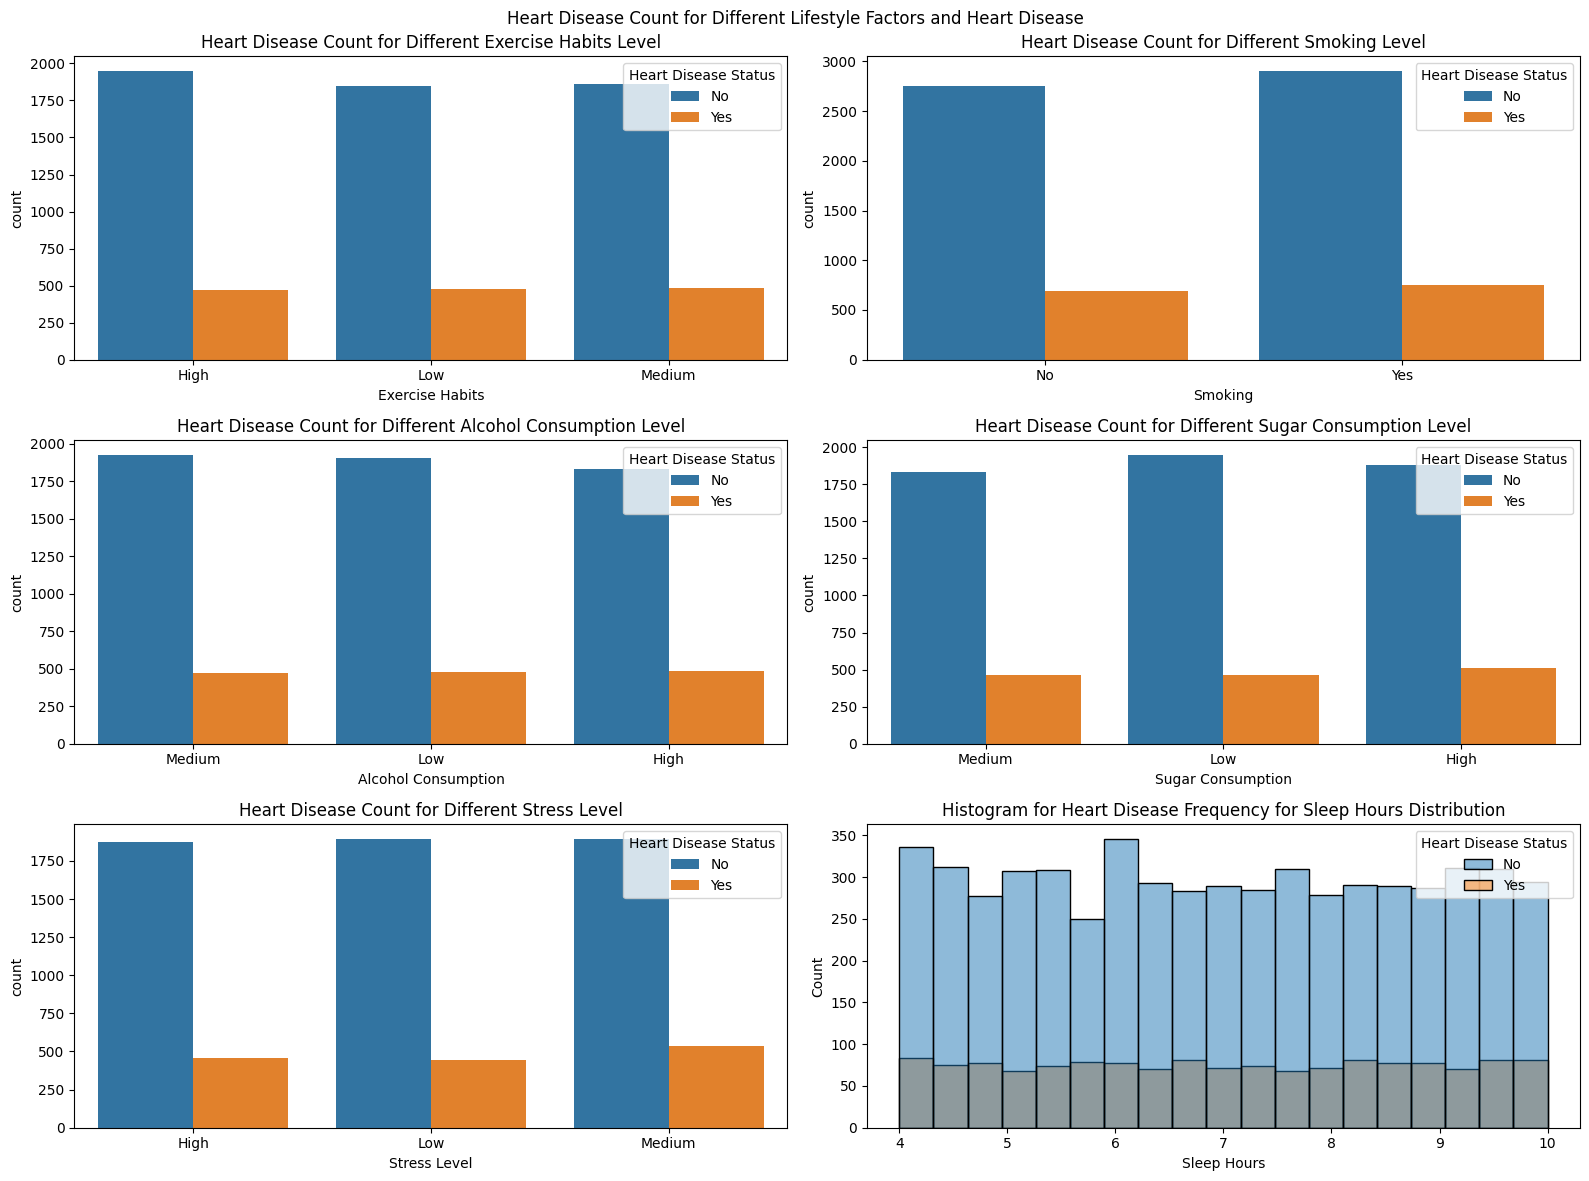

In [15]:
fig = plt.figure(figsize=(16, 12), tight_layout=True)
fig.suptitle("Heart Disease Count for Different Lifestyle Factors and Heart Disease")

plt.subplot(3, 2, 1)
sns.countplot(data=lifestyle, x="Exercise Habits", hue="Heart Disease Status")
plt.title("Heart Disease Count for Different Exercise Habits Level")

plt.subplot(3, 2, 2)
sns.countplot(data=lifestyle, x="Smoking", hue="Heart Disease Status")
plt.title("Heart Disease Count for Different Smoking Level")

plt.subplot(3, 2, 3)
sns.countplot(data=lifestyle, x="Alcohol Consumption", hue="Heart Disease Status")
plt.title("Heart Disease Count for Different Alcohol Consumption Level")

plt.subplot(3, 2, 4)
sns.countplot(data=lifestyle, x="Sugar Consumption", hue="Heart Disease Status")
plt.title("Heart Disease Count for Different Sugar Consumption Level")

plt.subplot(3, 2, 5)
sns.countplot(data=lifestyle, x="Stress Level", hue="Heart Disease Status")
plt.title("Heart Disease Count for Different Stress Level")

plt.subplot(3, 2, 6)
sns.histplot(data=lifestyle, x="Sleep Hours", hue="Heart Disease Status")
plt.title("Histogram for Heart Disease Frequency for Sleep Hours Distribution")

plt.show()

### Compare individuals with diabetes with individuals without diabetes.

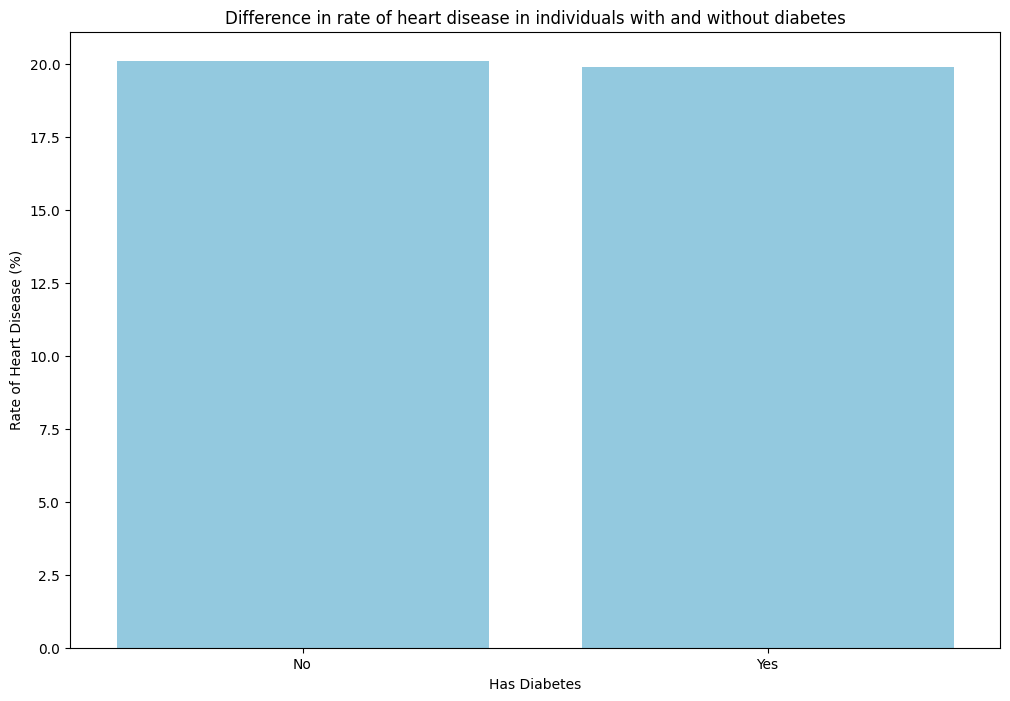

In [16]:
diabetes_df = heart_df.dropna(subset=["Diabetes"])

diabetes = diabetes_df.groupby("Diabetes")["Heart Disease Status"].mean().reset_index()
diabetes["Heart Disease Status"] = diabetes["Heart Disease Status"] * 100

plt.figure(figsize=(12,8))

sns.barplot(data=diabetes, x="Diabetes", y="Heart Disease Status", color='skyblue')
plt.title("Difference in rate of heart disease in individuals with and without diabetes")
plt.xlabel("Has Diabetes")
plt.ylabel("Rate of Heart Disease (%)")

plt.show()